## In this notebook, we sample from different kernels used in the Gaussian Process
These kernels are used to compute the covarinace matrices for any two points in the input space

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### In this Section, we sample from the Matern kernel with zero as the mean function

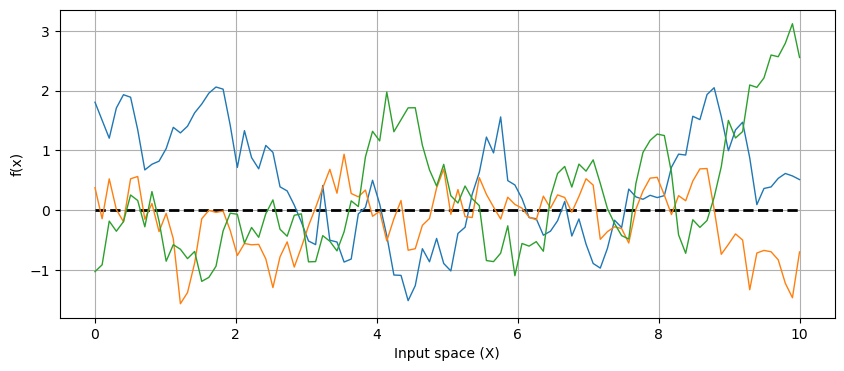

In [2]:
# Define the Matérn kernel function
def matern_kernel(x1, x2, length_scale, sigma_f, nu=0.5):
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    pairwise_dists = np.sqrt(np.sum((x1[:, np.newaxis] - x2[np.newaxis, :])**2, axis=-1))
    factor = (np.sqrt(2 * nu) * pairwise_dists) / length_scale
    
    if nu == 0.5:
        K = np.exp(-factor)
    elif nu == 1.5:
        K = (1 + factor) * np.exp(-factor)
    elif nu == 2.5:
        K = (1 + factor + factor**2 / 3) * np.exp(-factor)
    else:
        K = (2 ** (1 - nu) / gamma(nu)) * (factor ** nu) * kv(nu, factor)
        
    return sigma_f**2 * K

# Generate test points
X_s = np.linspace(0, 10, 100).reshape(-1, 1)

# Set hyperparameters for the Matérn kernel
length_scale = 1.0
sigma_f = 1.0
nu = 0.5

# Compute the covariance matrix for the test points
K_ss = matern_kernel(X_s, X_s, length_scale, sigma_f, nu)

# Generate samples from the prior
prior_samples = np.random.multivariate_normal(np.zeros(X_s.shape[0]), K_ss, 3)

# Plotting
plt.figure(figsize=(10, 4))

# Plot the mean function (zero mean)
plt.plot(X_s, np.zeros(X_s.shape[0]), 'k--', lw=2, label='Mean Function (Zero)')

# Plot samples from the GP prior
for i, sample in enumerate(prior_samples):
    plt.plot(X_s, sample, lw=1, label=f'Sample {i+1}')


plt.xlabel('Input space (X)')
plt.ylabel('f(x)')

plt.grid(True)
plt.show()



### In this Section, we sample from the Squared Exponential kernel with zero as the mean function

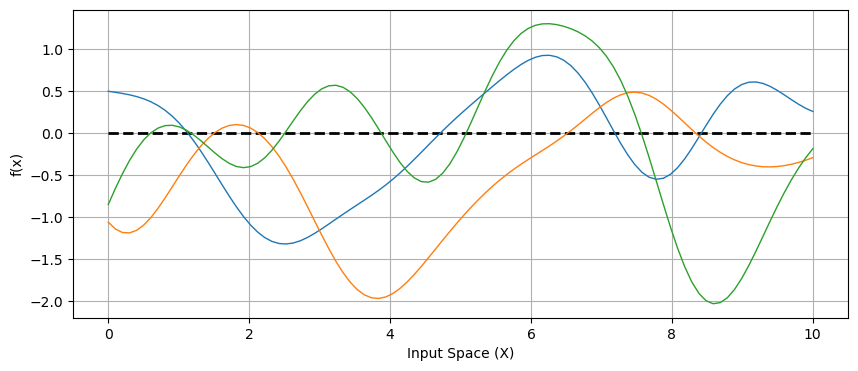

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Squared Exponential (SE) kernel function
def squared_exponential_kernel(x1, x2, length_scale, sigma_f):
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    pairwise_dists = np.sum((x1[:, np.newaxis] - x2[np.newaxis, :])**2, axis=-1)
    K = sigma_f**2 * np.exp(-pairwise_dists / (2 * length_scale**2))
    return K

# Generate test points
X_s = np.linspace(0, 10, 100).reshape(-1, 1)

# Set hyperparameters for the Squared Exponential kernel
length_scale = 1.0
sigma_f = 1.0

# Compute the covariance matrix for the test points
K_ss = squared_exponential_kernel(X_s, X_s, length_scale, sigma_f)

# Generate samples from the prior
prior_samples = np.random.multivariate_normal(np.zeros(X_s.shape[0]), K_ss, 3)

# Plotting
plt.figure(figsize=(10, 4))

# Plot the mean function (zero mean)
plt.plot(X_s, np.zeros(X_s.shape[0]), 'k--', lw=2, label='Mean Function (Zero)')

# Plot samples from the GP prior
for i, sample in enumerate(prior_samples):
    plt.plot(X_s, sample, lw=1, label=f'Sample {i+1}')


plt.xlabel('Input Space (X)')
plt.ylabel('f(x)')

plt.grid(True)
plt.show()



### In this Section, we sample from the Rational Quadratic kernel with zero as the mean function

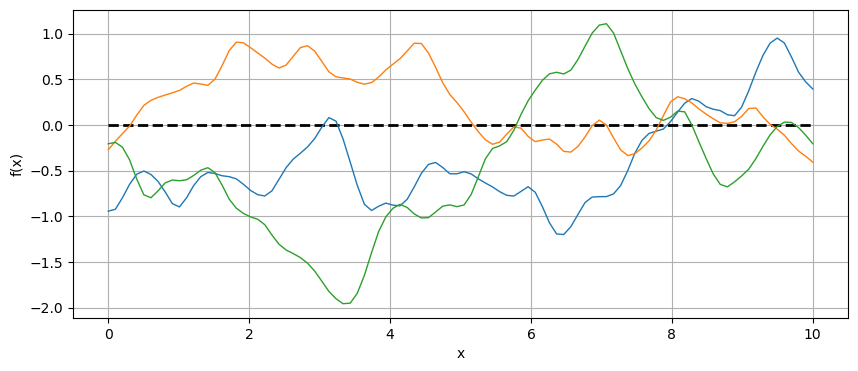

In [4]:


# Define the Rational Quadratic (RQ) kernel function
def rational_quadratic_kernel(x1, x2, length_scale, sigma_f, alpha):
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    pairwise_dists = np.sum((x1[:, np.newaxis] - x2[np.newaxis, :])**2, axis=-1)
    K = sigma_f**2 * (1 + pairwise_dists / (2 * alpha * length_scale**2))**(-alpha)
    return K

# Generate test points
X_s = np.linspace(0, 10, 100).reshape(-1, 1)

# Set hyperparameters for the Rational Quadratic kernel
length_scale = 1.0
sigma_f = 1.0
alpha = 0.1  # Shape parameter for multi-scale modeling

# Compute the covariance matrix for the test points
K_ss = rational_quadratic_kernel(X_s, X_s, length_scale, sigma_f, alpha)

# Generate samples from the prior
prior_samples = np.random.multivariate_normal(np.zeros(X_s.shape[0]), K_ss, 3)

# Plotting
plt.figure(figsize=(10, 4))

# Plot the mean function (zero mean)
plt.plot(X_s, np.zeros(X_s.shape[0]), 'k--', lw=2, label='Mean Function (Zero)')

# Plot samples from the GP prior
for i, sample in enumerate(prior_samples):
    plt.plot(X_s, sample, lw=1, label=f'Sample {i+1}')


plt.xlabel('x')
plt.ylabel('f(x)')

plt.grid(True)
plt.show()



### In this Section, we sample from the Periodic kernel with zero as the mean function

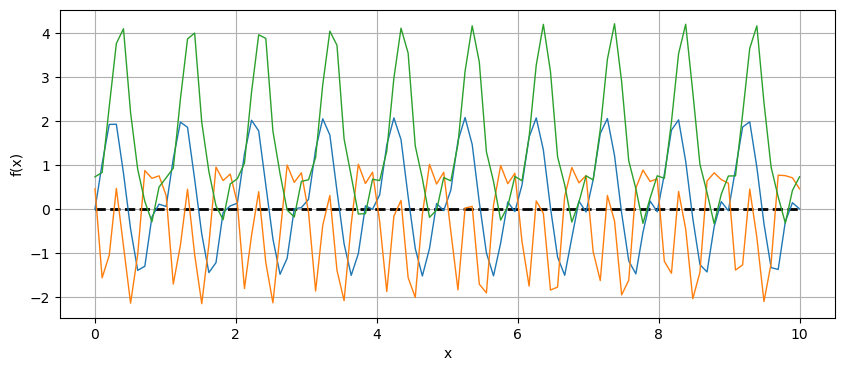

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Periodic kernel function
def periodic_kernel(x1, x2, length_scale, sigma_f, period):
    x1 = np.atleast_2d(x1)
    x2 = np.atleast_2d(x2)
    pairwise_dists = np.abs(x1 - x2.T)
    K = sigma_f**2 * np.exp(-2 * (np.sin(np.pi * pairwise_dists / period)**2) / length_scale**2)
    return K

# Generate test points
X_s = np.linspace(0, 10, 100).reshape(-1, 1)

# Set hyperparameters for the Periodic kernel
length_scale = 1.0
sigma_f = 2.0  # Increased variance
period = 1.0  # The periodicity of the kernel

# Compute the covariance matrix for the test points
K_ss = periodic_kernel(X_s, X_s, length_scale, sigma_f, period)

# Ensure the covariance matrix is symmetric and positive definite
K_ss = (K_ss + K_ss.T) / 2  # Make sure it's symmetric
K_ss += 1e-6 * np.eye(K_ss.shape[0])  # Add small jitter for numerical stability

# Generate samples from the prior
prior_samples = np.random.multivariate_normal(mean=np.zeros(X_s.shape[0]), cov=K_ss, size=3)

# Plotting
plt.figure(figsize=(10, 4))

# Plot the mean function (zero mean)
plt.plot(X_s, np.zeros(X_s.shape[0]), 'k--', lw=2, label='Mean Function (Zero)')

# Plot samples from the GP prior
for i, sample in enumerate(prior_samples):
    plt.plot(X_s, sample, lw=1, label=f'Sample {i+1}')

plt.xlabel('x')
plt.ylabel('f(x)')

plt.grid(True)

plt.show()
